## Importing the required libraries

In [1]:
import os
import cv2 
import imghdr
import numpy as np
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

## Importing Face Mask Dataset

In [2]:
data_dir = 'data' 

In [3]:
# Get a list of all files and directories in the 'data' folder
files = os.listdir(data_dir)

# Print the list of files
print("Files in 'data' folder:")
for file in files:
    print(file)

Files in 'data' folder:
without_mask
with_mask


In [4]:
without_mask_dir = os.path.join(data_dir, 'without_mask')
with_mask_dir = os.path.join(data_dir, 'with_mask')

# Get a list of all files in the 'without_mask' folder
without_mask_files = os.listdir(without_mask_dir)

# Get a list of all files in the 'with_mask' folder
with_mask_files = os.listdir(with_mask_dir)

# Print the list of files in the 'without_mask' folder
print("Files in 'without_mask' folder:")
for file in without_mask_files:
    print(os.path.join(without_mask_dir, file))

# Print the list of files in the 'with_mask' folder
print("Files in 'with_mask' folder:")
for file in with_mask_files:
    print(os.path.join(with_mask_dir, file))


Files in 'without_mask' folder:
data\without_mask\without_mask_1.jpg
data\without_mask\without_mask_10.jpg
data\without_mask\without_mask_100.jpg
data\without_mask\without_mask_1000.jpg
data\without_mask\without_mask_1001.jpg
data\without_mask\without_mask_1002.jpg
data\without_mask\without_mask_1003.jpg
data\without_mask\without_mask_1004.jpg
data\without_mask\without_mask_1005.jpg
data\without_mask\without_mask_1006.jpg
data\without_mask\without_mask_1007.jpg
data\without_mask\without_mask_1008.jpg
data\without_mask\without_mask_1009.jpg
data\without_mask\without_mask_101.jpg
data\without_mask\without_mask_1010.jpg
data\without_mask\without_mask_1011.jpg
data\without_mask\without_mask_1012.jpg
data\without_mask\without_mask_1013.jpg
data\without_mask\without_mask_1014.jpg
data\without_mask\without_mask_1015.jpg
data\without_mask\without_mask_1016.jpg
data\without_mask\without_mask_1017.jpg
data\without_mask\without_mask_1018.jpg
data\without_mask\without_mask_1019.jpg
data\without_ma

data\without_mask\without_mask_2764.jpg
data\without_mask\without_mask_2765.jpg
data\without_mask\without_mask_2766.jpg
data\without_mask\without_mask_2767.jpg
data\without_mask\without_mask_2768.jpg
data\without_mask\without_mask_2769.jpg
data\without_mask\without_mask_277.jpg
data\without_mask\without_mask_2770.jpg
data\without_mask\without_mask_2771.jpg
data\without_mask\without_mask_2772.jpg
data\without_mask\without_mask_2773.jpg
data\without_mask\without_mask_2774.jpg
data\without_mask\without_mask_2775.jpg
data\without_mask\without_mask_2776.jpg
data\without_mask\without_mask_2777.jpg
data\without_mask\without_mask_2778.jpg
data\without_mask\without_mask_2779.jpg
data\without_mask\without_mask_278.jpg
data\without_mask\without_mask_2780.jpg
data\without_mask\without_mask_2781.jpg
data\without_mask\without_mask_2782.jpg
data\without_mask\without_mask_2783.jpg
data\without_mask\without_mask_2784.jpg
data\without_mask\without_mask_2785.jpg
data\without_mask\without_mask_2786.jpg
da

data\with_mask\with_mask_1117.jpg
data\with_mask\with_mask_1118.jpg
data\with_mask\with_mask_1119.jpg
data\with_mask\with_mask_112.jpg
data\with_mask\with_mask_1120.jpg
data\with_mask\with_mask_1121.jpg
data\with_mask\with_mask_1122.jpg
data\with_mask\with_mask_1123.jpg
data\with_mask\with_mask_1124.jpg
data\with_mask\with_mask_1125.jpg
data\with_mask\with_mask_1126.jpg
data\with_mask\with_mask_1127.jpg
data\with_mask\with_mask_1128.jpg
data\with_mask\with_mask_1129.jpg
data\with_mask\with_mask_113.jpg
data\with_mask\with_mask_1130.jpg
data\with_mask\with_mask_1131.jpg
data\with_mask\with_mask_1132.jpg
data\with_mask\with_mask_1133.jpg
data\with_mask\with_mask_1134.jpg
data\with_mask\with_mask_1135.jpg
data\with_mask\with_mask_1136.jpg
data\with_mask\with_mask_1137.jpg
data\with_mask\with_mask_1138.jpg
data\with_mask\with_mask_1139.jpg
data\with_mask\with_mask_114.jpg
data\with_mask\with_mask_1140.jpg
data\with_mask\with_mask_1141.jpg
data\with_mask\with_mask_1142.jpg
data\with_mask\wi

data\with_mask\with_mask_2917.jpg
data\with_mask\with_mask_2918.jpg
data\with_mask\with_mask_2919.jpg
data\with_mask\with_mask_292.jpg
data\with_mask\with_mask_2920.jpg
data\with_mask\with_mask_2921.jpg
data\with_mask\with_mask_2922.jpg
data\with_mask\with_mask_2923.jpg
data\with_mask\with_mask_2924.jpg
data\with_mask\with_mask_2925.jpg
data\with_mask\with_mask_2926.jpg
data\with_mask\with_mask_2927.jpg
data\with_mask\with_mask_2928.jpg
data\with_mask\with_mask_2929.jpg
data\with_mask\with_mask_293.jpg
data\with_mask\with_mask_2930.jpg
data\with_mask\with_mask_2931.jpg
data\with_mask\with_mask_2932.jpg
data\with_mask\with_mask_2933.jpg
data\with_mask\with_mask_2934.jpg
data\with_mask\with_mask_2935.jpg
data\with_mask\with_mask_2936.jpg
data\with_mask\with_mask_2937.jpg
data\with_mask\with_mask_2938.jpg
data\with_mask\with_mask_2939.jpg
data\with_mask\with_mask_294.jpg
data\with_mask\with_mask_2940.jpg
data\with_mask\with_mask_2941.jpg
data\with_mask\with_mask_2942.jpg
data\with_mask\wi

In [5]:
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [6]:
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [7]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3720
Number of without mask images: 3828


In [8]:
# From the length we can easily see the data we have is not that much imbalence.

### Creating Labels for the two class of Images

with mask  -->  1

without mask  -->  0

In [9]:
# create the labels
with_mask_labels = [1]*3720
without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
# Combininig two list that we have

labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7548
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

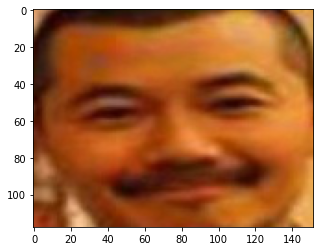

In [12]:
# displaying with mask image
img = mpimg.imread('data/without_mask/without_mask_120.jpg')
imgplot = plt.imshow(img)
plt.show()

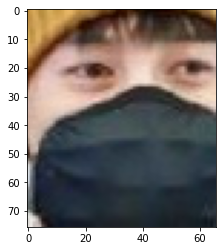

In [13]:
# displaying without mask image
img = mpimg.imread('data/with_mask/with_mask_1098.jpg')
imgplot = plt.imshow(img)
plt.show()

## Image Processing

1. Resize the Images

2. Convert the images to numpy arrays

In [14]:
# convert images to numpy arrays after resizing those.

with_mask_path = 'data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
type(data)

list

In [16]:
len(data)

7548

In [17]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [18]:
type(data[0])

numpy.ndarray

In [19]:
data[0].shape

(128, 128, 3)

In [20]:
# converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [21]:
type(X)

numpy.ndarray

In [22]:
type(Y)

numpy.ndarray

In [23]:
print(X.shape)
print(Y.shape)

(7548, 128, 128, 3)
(7548,)


In [24]:
print(Y)

[1 1 1 ... 0 0 0]


## Train Test Split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(7548, 128, 128, 3) (6038, 128, 128, 3) (1510, 128, 128, 3)


In [27]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [28]:
X_train[0]

array([[[225, 235, 198],
        [210, 216, 186],
        [189, 188, 169],
        ...,
        [187, 182, 165],
        [181, 174, 151],
        [165, 182, 133]],

       [[224, 228, 217],
        [202, 204, 195],
        [201, 199, 193],
        ...,
        [198, 190, 180],
        [177, 169, 154],
        [158, 182, 141]],

       [[205, 204, 214],
        [221, 219, 227],
        [195, 191, 197],
        ...,
        [183, 173, 174],
        [174, 165, 160],
        [174, 203, 166]],

       ...,

       [[155, 176, 199],
        [160, 180, 197],
        [165, 185, 195],
        ...,
        [ 88,  99,  71],
        [106, 113,  85],
        [ 99, 104,  63]],

       [[150, 177, 197],
        [168, 190, 208],
        [174, 192, 209],
        ...,
        [106, 113,  81],
        [ 99, 103,  67],
        [ 99,  99,  33]],

       [[160, 193, 210],
        [177, 198, 221],
        [175, 189, 214],
        ...,
        [103, 107,  70],
        [ 77,  81,  47],
        [ 99,  94,  63]]

In [29]:
X_train_scaled[0]

array([[[0.88235294, 0.92156863, 0.77647059],
        [0.82352941, 0.84705882, 0.72941176],
        [0.74117647, 0.7372549 , 0.6627451 ],
        ...,
        [0.73333333, 0.71372549, 0.64705882],
        [0.70980392, 0.68235294, 0.59215686],
        [0.64705882, 0.71372549, 0.52156863]],

       [[0.87843137, 0.89411765, 0.85098039],
        [0.79215686, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75686275],
        ...,
        [0.77647059, 0.74509804, 0.70588235],
        [0.69411765, 0.6627451 , 0.60392157],
        [0.61960784, 0.71372549, 0.55294118]],

       [[0.80392157, 0.8       , 0.83921569],
        [0.86666667, 0.85882353, 0.89019608],
        [0.76470588, 0.74901961, 0.77254902],
        ...,
        [0.71764706, 0.67843137, 0.68235294],
        [0.68235294, 0.64705882, 0.62745098],
        [0.68235294, 0.79607843, 0.65098039]],

       ...,

       [[0.60784314, 0.69019608, 0.78039216],
        [0.62745098, 0.70588235, 0.77254902],
        [0.64705882, 0

## Building a Convolutional Neural Networks (CNN)

In [30]:
# Setting the architecture of neural network.
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))  
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu')) 
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [31]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [32]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 405s 2s/step - loss: 0.4463 - acc: 0.7981 - val_loss: 0.2761 - val_acc: 0.8775
Epoch 2/5
170/170 [==============================] - 405s 2s/step - loss: 0.2949 - acc: 0.8830 - val_loss: 0.1967 - val_acc: 0.9189
Epoch 3/5
170/170 [==============================] - 404s 2s/step - loss: 0.2426 - acc: 0.9045 - val_loss: 0.1794 - val_acc: 0.9288
Epoch 4/5
170/170 [==============================] - 403s 2s/step - loss: 0.2038 - acc: 0.9190 - val_loss: 0.1458 - val_acc: 0.9371
Epoch 5/5
170/170 [==============================] - 402s 2s/step - loss: 0.1605 - acc: 0.9345 - val_loss: 0.1593 - val_acc: 0.9321


## Model Evaluation

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [35]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 31s 653ms/step - loss: 0.2167 - acc: 0.9219
Test Accuracy = 0.9218543171882629


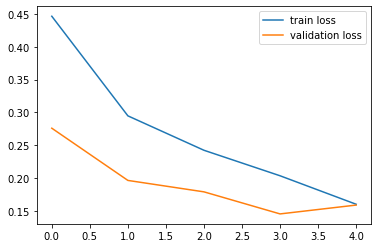

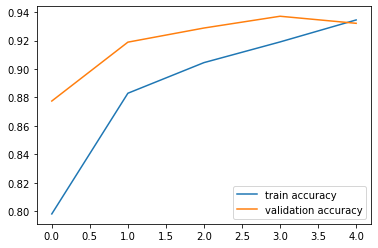

In [36]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

## Saving the Model

In [37]:
model.save(os.path.join('models','maskdetectionmodel.h5'))

## Importing the model

In [38]:
new_model = load_model(os.path.join('models','maskdetectionmodel.h5'))

## Predictive system(In the given image whether the person wearing mask or not)

In [39]:
def convert_to_jpg(input_image_path, output_image_path):
    image = cv2.imread(input_image_path)
    cv2.imwrite(output_image_path, image, [cv2.IMWRITE_JPEG_QUALITY, 90])

def predict_function(image_path):
    # Convert image to JPG format
    jpg_image_path = 'temp_image.jpg'
    convert_to_jpg(image_path, jpg_image_path)

    # Load the pre-trained model
    model1 = new_model

    # Load the image using OpenCV
    input_image = cv2.imread(jpg_image_path)
    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    # Predict using the model
    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    # Display the prediction result
    plt.imshow(input_image)
    plt.axis('off')

    if input_pred_label == 1:
        plt.title('The person in the image is not wearing a mask')
    else:
        plt.title('The person in the image is wearing a mask')

    plt.show()
        # Delete the temporary JPG image
    os.remove(jpg_image_path)

Path of the image to be predicted: C:\Users\DELL\Desktop\PRTFLIO\Extra_Learning\Data_Science_practice\Face Mask Detection\withmask2.jpeg
1/1 [==============================] - 0s 69ms/step


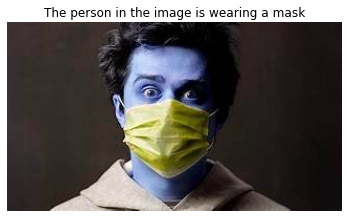

In [43]:
image_path = input('Path of the image to be predicted: ')
predict_function(image_path)

Path of the image to be predicted: C:\Users\DELL\Desktop\PRTFLIO\Extra_Learning\Data_Science_practice\Face Mask Detection\withoutmask2.jpeg
1/1 [==============================] - 0s 53ms/step


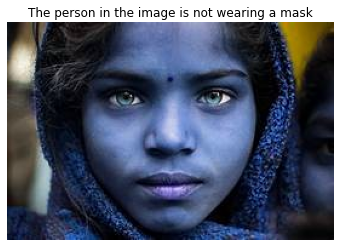

In [42]:
image_path = input('Path of the image to be predicted: ')
predict_function(image_path)

## Predictive system ( Live Mask Detection)

In [44]:
# Load the pre-trained face mask detection model
model = new_model

# Load the face detector model from OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect and classify face with/without mask
def detect_face_mask(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(60, 60), flags=cv2.CASCADE_SCALE_IMAGE)

    for (x, y, w, h) in faces:
        face_roi = frame[y:y + h, x:x + w]
        face_roi = cv2.resize(face_roi, (128, 128))
        face_roi = tf.keras.applications.mobilenet_v2.preprocess_input(face_roi)
        face_roi = np.expand_dims(face_roi, axis=0)

        mask, without_mask = model.predict(face_roi)[0]

        label = "Mask" if mask > without_mask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        label = f"{label}: {max(mask, without_mask) * 100:.2f}%"

        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 3)

    return frame

# Function to capture video from laptop camera
def main():
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = detect_face_mask(frame)

        cv2.imshow('Face Mask Detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 78ms/step
